# 가설과 추론

지금까지 배운 통계와 확률 이론을 활용하여
가설을 세우고 검정하는 방법을 배운다.

여기서 다루는 주제는 다음과 같다.

1. 통계적 가설검정
    1. 귀무가설/대립가설
    1. 유의수준
    1. 양측검정/단측검정
    1. 기각역과 가설검정
    1. $p$-값과 가설검정
1. 신뢰구간
    1. 신뢰구간과 가설검정
    1. 신뢰수준/유의수준
1. $p$-해킹, 세상 일이 원래 그렇다!
1. A/B 테스트
1. 베이지안 추론
    1. 사전분포/사후분포
    1. 베타분포

## 통계적 가설검정

통계적 가설검정은 
모집단에 대한 가설을 세운 후 표본을 통해 얻은 통계를 이용하여 
해당 가설을 검정(test)하는 것을 의미한다.

**참고**: 검정(test), 테스팅(testing), 검증(verification)은 조금씩 다른 의미로 사용된다. 

* 검정: 일정 기준을 만족하는지 여부 판단
* 테스팅: 특정 기능을 잘 수행하는지 여부 판단
* 검증: 특정 성질을 만족하는지 여부 판단

### 귀무가설과 대립가설

검정 대상인 가설을 **귀무가설**($H_0$, null hypothesis), 
그에 대립되는 가설을 **대립가설**($H_1$, alternative hypothesis)라 부른다. 

통계를 사용하여 귀무가설 $H_0$를 받아들일지, 아니면 기각하고 대립가설 $H_1$을 받아들일지를 결정한다.
귀무가설을 검정할 때 발생할 수 있는 오류에는 두 종류가 있다. 

* **제1종 오류**: 귀무가설 $H_0$가 참이지만 기각하는 오류
* **제2종 오류**: 귀무가설 $H_0$가 거짓이지만 받아들이는 오류

그리고 제2종 오류가 발생하지 않을 확률을 **검정력**이라 부른다.

## 주요 예제: 동전 던지기

동전 던지기를 이용하여 통계적 가설검정을 설명한다. 

지금까지는 동전이 공평한 동전인지 아니면 앞면 또는 뒷면이 보다 많이 나오는 편향된 동전인지 
알고서 특정 사건이 발생할 확률을 구했다. 
그런데 이제는 동전에 대한 정보를 모른다고 가정한다.
그리고 나서 모의실험 결과를 확인한 후에 동전이 공평한 동전인지 여부를 추정한다.
이게 바로 **통계적 가설검정**이라고 부르는 이유이다. 

### 이항분포와 정규분포

동전을 $n$번 던져서 앞면이 나오는 횟수를 $X$라 하면,
$X$는 이항분포를 따르는 확률변수로 간주될 수 있습니다.
이유는 동전을 던져 앞면이 나오는 것을 성공이라고 할 때 반복적인 동전 던지기는
아래 조건을 만족하는 **베르누이 시행**이 되기 때문입니다.

* 동일한 동전을 던질 때마다 앞면(성공) 또는 뒷면(실패) 두 결과만 갖는다.
* 동일한 동전을 던질 때마다 앞면이 나올 확률 $p$와, 뒷면이 나올 확률 $1-p$는 그 값이 일정하다. 
* 동일한 동전을 던진 결과가 이전, 이후의 동전 던지기의 결과와 아무 상관이 없다. 
    즉, 각각의 동전 던지기 시행이 상호 독립적이다.

따라서 동전을 한 번 던져서 앞면이 나올 확률을 $p$라 할 때,
$X$는 베르누이 확률분포를 따르며
따라서 다음 모양의 이항분포로 표기할 수 있습니다. 

$$X \sim B(n, p)$$

또한 앞서 살펴 보았듯이 $n$이 충분히 크면 중심극한정리에 의해
$X$는 평균값(mean)은 $\mu = n p$ 이고 
표준편차는 $\sigma = \sqrt{n p (1-p)}$ 인 
정규분포를 따른다.
즉, 다음이 성립한다.

$$X \sim N(n p, n p (1-p))$$

아래 코드는 $n$이 충분히 클 때 확률 변수 $X$의 평균값과 표준편차를 구해주는 함수를 정의한다.

이제 동전을 1,000번 던지는 모의실험을 실행했다고 가정하자. 
즉, $n = 1000$ 이다.


그리고 검정해야할 (귀무)가설 $H_0$는 '동전이 공평하다'로 정한다.

> $H_0$: $p = 0.5$

아래 코드는 $n$이 충분히 클 때 확률 변수 $X$의 평균값과 표준편차를 구해주는 함수를 정의한다.

아래 코드는 $n$이 충분히 클 때 확률 변수 $X$의 평균값과 표준편차를 구해주는 함수를 정의한다.

In [1]:
from typing import Tuple
import math

def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    """
    X ~ B(n,p)이고 n이 충분히 클 때,
    평균값 mu와 표준편차 sigma 계산 
    """
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

'동전 1000번 던지기'의 경우 앞면이 나온 횟수 $X$가 따르는 정규분포는 다음과 같다.

$$X \sim N(\mu_0, \sigma_0^2) = N(500, 250) = N(500, 15.8^2)$$

$\mu_0$와 $\sigma_0$ 계산은 앞서 정의한 함수를 이용한다.

In [2]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print(f"평균:\t{mu_0}")
print(f"표준편차:\t{sigma_0:.1f}")

평균:	500.0
표준편차:	15.8


이제 동전을 1,000번 던지는 모의실험을 실행했다고 가정하자. 
즉, $n = 1000$ 이다.
그리고 '동전이 공평하다'라는 가설을 검정해야 한다. 
즉, 검정 대상 가설인 귀무가설($H_0$)를 아래와 같이 지정한다.

> $H_0$: $p = 0.5$

### 주의사항

여기서 설명하는 가설검정은 다루는 확률분포가 정규분포를 따른다고 전제한다.
하지만 정규분포가 아니라 하더라도 다루는 수치가 조금 달라질 뿐 기본적으로 동일한 과정으로 가설검정이 진행된다. 
정규분포를 따르는가 여부를 확인하려면 앞서 설명한 방식으로 모의실험을 진행해서 그래프로 그려보면 된다.

### 정규분포 관련 함수 정리

아래 코드는 $n$이 충분히 클 때 확률 변수 $X$의 평균값과 표준편차를 구해주는 함수를 정의한다.

정규분포를 이용한 가설검정을 수행하기 위해 필요한 관련 함수들을 먼저 확인하고자 한다. 
아래 코드는 이전에 사용한 코드를 모아 놓은 '../scratch' 폴더에 있는
파이썬 모듈을 불러오기 위해 필요하다. 

In [3]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

가설검정은 발생한 특정 사건이 지정된 확률분포 구간에 포함되는지 
여부를 확인하여 귀무가설을 받아들일지 여부를 판단한다.

여기서는 정규분포에서 확률 변수가 특정 값보다 작을 확률을 
계산하는 누적 분포 함수 `normal_cdf()` 를 이용하여, 
확률 변수가 특정 구간에 포함될 확률을 계산하는 도우미 함수 네 개를 정의한다. 

* `normal_probability_below`: 확률 변수가 특정 값보다 작을 확률
* `normal_probability_above`: 확률 변수가 특정 값보다 클 확률
* `normal_probability_between`: 확률 변수가 특정 구간에 위치할 확률
* `normal_probability_outside`:확률 변수가 특정 구간 밖에 위치할 확률

In [4]:
from scratch.probability import normal_cdf

normal_probability_below = normal_cdf

def normal_probability_above(lo: float,
                             mu: float = 0,
                             sigma: float = 1) -> float:
    return 1 - normal_cdf(lo, mu, sigma)

def normal_probability_between(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

def normal_probability_outside(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    return 1 - normal_probability_between(lo, hi, mu, sigma)

<Figure size 432x288 with 0 Axes>

또한 누적 분포 함수의 역함수를 이용하여 확률이 주어졌을 때 평균값을 중심으로
좌우 어느 정도의 구간에 해당하는지를 계산하는 것과 관련된 함수 세 개를 정의한다.

* `normal_upper_bound(p)`: $P(Z \le z)=p$ 인 $z$ 계산
* `normal_lower_bound(p)`:$P(Z \ge z)=p$ 인 $z$ 계산
* `normal_two_sided_bound(p)`:$P(z_1 \le Z \le z_2)=p$ 인 $z_1, z_2$ 계산

In [5]:
from scratch.probability import inverse_normal_cdf

def normal_upper_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float,
                            mu: float = 0,
                            sigma: float = 1) -> Tuple[float, float]:
    tail_probability = (1 - probability) / 2

    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

### 주의사항

여기서 설명하는 가설검정은 다루는 확률분포가 정규분포를 따른다고 전제한다.
하지만 정규분포가 아니라 하더라도 다루는 수치가 조금 달라질 뿐 기본적으로 동일한 과정으로 가설검정이 진행된다. 
정규분포를 따르는가 여부를 확인하려면 앞서 설명한 방식으로 모의실험을 진행해서 그래프로 그려보면 된다.

## 통계적 가설검정

통계적 가설검정은 
모집단에 대한 가설을 세운 후 표본을 통해 얻은 통계를 이용하여 
해당 가설을 검정(test)하는 것을 의미한다.

**참고**: 검정(test), 테스팅(testing), 검증(verification)은 조금씩 다른 의미로 사용된다. 

* 검정: 일정 기준을 만족하는지 여부 판단
* 테스팅: 특정 기능을 잘 수행하는지 여부 판단
* 검증: 특정 성질을 만족하는지 여부 판단

### 귀무가설과 대립가설

검정 대상인 가설을 **귀무가설**($H_0$, null hypothesis), 
그에 대립되는 가설을 **대립가설**($H_1$, alternative hypothesis)라 부른다. 

통계를 사용하여 귀무가설 $H_0$를 받아들일지, 아니면 기각하고 대립가설 $H_1$을 받아들일지를 결정한다.
귀무가설을 검정할 때 발생할 수 있는 오류에는 두 종류가 있다. 

* **제1종 오류**: 귀무가설 $H_0$가 참이지만 기각하는 오류
* **제2종 오류**: 귀무가설 $H_0$가 거짓이지만 받아들이는 오류

그리고 제2종 오류가 발생하지 않을 확률을 **검정력**이라 부른다.

### 유의수준

귀무가설을 검정하려면 먼저 **유의수준**(significance)을 지정해야 한다.
유의수준은 보통 5% 또는 1%로 정하며, 여기서는 5%를 사용한다.

유의수준이 5%라는 것은 
귀무가설이 정말로 참이라고 해도 
발생확률이 5%가 안되는 사건이 모의실험에서 발생하면 
어쩔 수 없이 귀무가설을 기각해야 한다는 것을 의미한다.
즉, 제1종 오류를 범할 확률이 5%라는 의미이다.

### 양측검정/단측검정

가설검정 방법에 크게 세 가지 방법이 있다.

* **양측검정**(two-tailed test)
    * 귀무가설: '...이 ...와 동일하다'의 형식
    * 대립가설:  '...이 ...와 동일하지 않다'의 형식
* **상단측검정**(upper-tailed test)
    * 귀무가설: '...이 ...보다 같거자 작다'의 형식
    * 대립가설: '...이 ...보다 크다'의 형식
* **하단측검정**(lower-tailed test)
    * 귀무가설: '...이 ...보다 같거나 크다'의 형식
    * 대립가설: '...이 ...보다 작다'의 형식    

### 기각역과 가설검정

유의수준에 따라 귀무가설을 기각하기 위한 기준으로 사용되는 값들의 집합을 **기각역**이라 하며,
가설검정 방식에 따라 위치와 크기가 달라진다.
아래 그래프는 차례대로 유의수준 5%에서 양측검정, 상단측검정, 하단측검정의 기각역을 보여준다.

<p>
<table cellspacing="20">
<tr>
    <td><img src="../images/two-sided-region.png"></td>
    <td><img src="../images/one-sided-region-up.png"></td>
    <td><img src="../images/one-sided-region-down.png"></td>
</tr>
<tr>
    <td>양측검정</td>
    <td>상단측검정</td>
    <td>하단측검정</td>
</tr>
</table>
</p>

#### 동전 던지기 양측검정

귀무가설이 $H_0: p = 0.5$, 즉 '동전이 공평하다'라는 가설을 검정해야 하므로,
대립가설을 '동전이 공평하지 않다'에 해당하는 $H_1: p \neq 5$로 정한다.
그리고 이럴 경우 양측검정을 사용해서 가설검정을 실행한다.

유의수준 5%로 양측검정을 실행할 때, 기각역은 위 첫째 그래프에서 보이는 것처럼
양끝의 2.5%에 해당하는 구간이다. 
실제로 확인해보면 다음과 같다.

In [6]:
from math import ceil, floor

lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

print(f"하단기각역: {floor(lo)} 이하")
print(f"상단기각역: {ceil(hi)} 이상")

하단기각역: 469 이하
상단기각역: 531 이상


위 결과의 의미는 다음과 같다.

귀무가설이 참일 때, 즉, 공평한 동전을 1,000번 던지면

* 2.5%의 확률로 469회 이하 앞면이 나오고,
* 2.5%의 확률로 531회 이상 앞면이 나온다.
* 즉, 앞면이 나오는 횟수가 469에서 531 사이에 발생할 확률이 95%이다.

**주의** 'k가 m에서 n 사이이다'의 의미는 'm < k < n'을 의미한다. 

<img src="../images/p-value_469531.png" width="50%">

따라서 모의실험 결과 앞면이 나온 횟수가 469회 이하 또는 531회 이상이면 
발생가능성이 5%로 매우 희박한 일이 발생하였다고 보고
귀무가설을 기각한다.

물론, 확률이 5%라는 게 매우 낮은 수치이기는 하지만 0%는 아니기에 공평한 동전을 1,000번
던졌을 때 발생할 수는 있다.
이런 의미에서 옳은 귀무가설을 기각하는 잘못을 저지를 확률이 바로 유의수준 5%의 의미이다.

##### 동전 던지기 양측검정과 검정력

검정력(test power)은 틀린 귀무가설을 기각하지 않는
**제2종 오류**를 범하지 않을 확률이다.
따라서 검정력을 계산하려면 제2종 오류를 범할 확률을 구해야 한다.

예를 들어, 동전 앞면이 나올 확률이 $p=0.55$로 앞면쪽으로 약간 편향되어 있다고 하자.
그러면 해당 정규분포의 평균과 표준편차는 다음과 같다.

$$X \sim B(1000, 0.55) \sim N(\mu_1, \sigma_1^2) = N(550, 15.7^2)$$

$\mu_1$와 $\sigma_1$ 계산은 `normal_approximation_to_binomial()` 함수를 이용한다.

In [7]:
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
print(f"p=0.55일 때 평균(mu_1):\t\t {mu_1}")
print(f"p=0.55일 때 표준편차(sigma_1):\t {sigma_1}")

p=0.55일 때 평균(mu_1):		 550.0
p=0.55일 때 표준편차(sigma_1):	 15.732132722552274


그래서 제2종 오류를 범할 확률은
$p=0.55$인 동전을 1,000번 던졌을 때 
469회에서 531회 사이에 앞면이 나올 확률을 아래와 같이 계산하면 된다. 
이유는 그런 경우가 공평한 동전을 던지면 95%의 확률로 발생하기 때문이다. 

실제로 아래 코드를 이용하여 계산된 확률은 11.3%이다.

In [8]:
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
print(f"{type_2_probability:.3f}")

0.113


따라서 제2종 오류를 범하지 않을 확률인 검정력은 88.7%이다.

In [9]:
power = 1 - type_2_probability
print(f"{power:.3f}")

0.887


#### 동전 던지기 상단측검정

앞서 검정력을 양측검정을 이용하여 계산하였다.
하지만 귀무가설을 '동전이 앞면이 덜 나온다'로 정하면 상단측검정을 이용해야 한다.
즉, 귀무가설과 대립가설을 아래와 같이 설정한다.

* $H_0: p \le 0.5$
* $H_1: p > 0.5$

따라서 유의수준 5%의 기각역은 $p=0.5$일 때 상단 5%에 해당하는 구간이다.
이유는 $p\le 0.5$ 일 때, 95%의 확률로 나올 수 있는 앞면의 횟수의 최댓값은
$p=0.5$일 때 95%의 확률로 나올 수 있는 앞면의 횟수의 최댓값이기 때문이다. 

아래 코드에서 확인할 수 있듯이 기각역은 527부터 시작한다.
즉, 앞면이 527회 이상 나오면 나오면 공평한 동전을 던졌을 때 나올 확률이 5% 이하인 경우가 발생한 것이다.

In [10]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)
print(f"hi 값: {hi:.3f}")

hi 값: 526.007


<img src="../images/p-value_527.png" width="50%">

따라서 $p= 0.55$인 동전이라 하더라도 동전을 1,000번 던졌을 때 
526회 이하로 앞면이 나오면 귀무가설을 기각할 수 없다. 
따라서 아래 코드가 계산해주듯이 제2종 오류를 범할 확률은 6.4%이다.

In [11]:
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
print(f"{type_2_probability:.3f}")

0.064


즉, 검정력이 93.6%로 높아진다.

In [12]:
power = 1 - type_2_probability 
print(f"{power:.3f}")

0.936


### 연습문제

동전 던지기를 이용하여 하단측검정 문제를 설정하고 검정력을 계산하라.

### $p$-값과 가설검정

$p$-값은 가설검정을 다른 관점에서 진행할 때 계산하는 값이다. 

앞서 동전 던지기 예제에서 귀무가설을 가정하고, 동전을 1,000번 던졌을 때
앞면이 나오는 횟수가 95%의 확률로 '469에서 531 사이' 이고,
따라서 그 범위를 벗어나면 귀무가설을 기각한다 라고 하였다.
즉, 가설검정 과정을 요약하면 다음과 같다.

1. 귀무가설을 전제로 하는 확률분포 설정
1. 지정된 유의수준을 이용하여 기각역 계산
1. 모의실험 결과가 기각역에 포함되는지 여부 판단
1. 귀무가설 기각 여부 판단

하지만 이 설명을 아래와 같이 다르게 설명할 수 있다.

1. 모의실험 결과를 확인한다.
    * 예를 들어, 1,000번 던져서 앞면이 530번 관측되었다고 하자.
    <br><br>

2. 귀무가설이 참일 때, 모의실험 결과와 같은 극단적인 값이 나올 확률을 계산한다. 
    계산된 확률을 **$p$-값**이라 부른다.
    * 예를 들어, 앞면이 530회 이상 발생할 확률 $p$ 를 계산한다.
    * 530회 이상 발생할 확률을 구하는 이유는 주사위의 편향 여부를 판단하기 위해서이다.
    <br><br>
3. $p$-값을 유의수준과 비교한다.
    * 양측검정의 경우
        * 유의수준의 **절반** 보다 크면, 모의실험 결과가 기각역 밖에 위치한다는 의미이며 따라서 귀무가설을 받아들인다.
        * 유의수준의 **절반** 보다 작으면, 모의실험 결과가 기각역 안에 위치한다는 의미이며 따라서 귀무가설을 기각한다.
    * 단측검정의 경우
        * 유의수준 보다 크면, 모의실험 결과가 기각역 밖에 위치한다는 의미이며 따라서 귀무가설을 받아들인다.
        * 유의수준 보다 작으면, 모의실험 결과가 기각역 안에 위치한다는 의미이며 따라서 귀무가설을 기각한다.

#### $p$-값과 양측검정

`two_sided_p_value()` 함수는 양측검정 기준으로
실제로 관측된 값보다 더 극단적인 값이 나올 확률을 구한다. 
최종 결과가 유의수준보다 크면 해당 사건이 기각역 밖에 존재한다는 의미이다.
사용되는 함수는 다음과 같다.

* `normal_probability_above()`: 지정된 값보다 더 큰 값을 가질 확률
* `normal_probability_below()`: 지정된 값보다 더 작은 값을 가질 확률

**주의**: 아래 코드에서 정의된 `two_sided_p_value`는
관측된 값보다 더 크거나 작은 값이 나올 확률을
**유의수준 자체와 직접 비교**할 수 있도록 앞서 언급된 두 함수가 내주는 값의 두 배를 리턴값으로 내준다.
아래 함수를 수정할 수 있지만, 이후에 사용되는 코드와의 호환성을 위해 그대로 사용한다.

In [13]:
def two_sided_p_value(x: float, 
                      mu: float = 0, 
                      sigma: float = 1) -> float:
    if x >= mu:
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        return 2 * normal_probability_below(x, mu, sigma)

##### 예제

공평한 동전을 던져서 앞면이 530회 나오는 것보다 더 극단적인 값이 나올 확률은 6.2%이며, 5% 보다 크다.
이는 530이 기각역 밖에 존재한다는 의미이고, 따라서 귀무가설을 받아들인다.

In [14]:
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598835

<img src="../images/p-value_530.png" width="50%">

##### 연속성 보정

앞선 코드에서 인자로 530 대신에 529.5를 사용하는 이유는 **연속성 보정** 때문이다.
연속성 보정은 이산 데이터에 대한 확률 추정을 연속 데이터에 대한 확률 추정을 이용할 경우 
기본적으로 사용된다.

동전 던지기는 전형적인 이산 확률분포의 한 종류인 이항분포이다.
반복횟수가 크면 중심극한정리에 연속확률분포인 정규분포로 다룰 수 있지만
그래도 엄밀히 따지면 이산확률분포이다.
따라서 정규분포를 이용해 확률을 계산할 때 오차를 보정해줄 필요가 있다.
이를 **연속성 보정**(continuity correction)이라 부르며,
아래 방법을 사용한다.

* 어떤 사건이 $k$회 이상 나올 확률을 계산 할 때, 보통 $k-0.5$ 이상에 대한 확률을 계산한다.
* 어떤 사건이 $k$회 이하 나올 확률을 계산 할 때, 보통 $k+0.5$ 이하에 대한 확률을 계산한다.

수학적으로 확률은 확률밀도함수로 둘러싸인 면적을 적분으로 계산한다.
따라서 아래 그림에서 보이는 것처럼 보정을 해주는 것이 합리적이다.
아래 그림에서 보면 선그래프로 면적을 계산하는 것과 막대들의 면적으로 계산하는 것 사이에 오차가
있음을 알 수 있다. 
또한 $\pm 0.5$를 해주는 이유 또한 그래프에서 확인할 수 있다.
보다 자세한 설명은 [연속성 보정](https://github.com/liganega/Stats/blob/master/notes/Stats09_Normal_Distrubution_2.pdf)을 
참조한다.

<img src="../images/continuity_correction.png" width="50%">

##### 모의실험으로 확인하기

정규분포 통계를 이용하지 않고, 모의실험을 통해 위 결과를 확인할 수 있다.
즉, '동전 1,000번 던지기'를 10,000번 반복하여 1,000번 던질 때 앞면이 
530회 이상 또는 470회 이하로 나오는 확률을 
모의실험해 보면 거의 비슷한 결과를 얻는다.

코드에 사용된 요소는 다음과 같다.

* `random` 모듈
    * `seed()` 함수: 동일한 모의실험 실행을 위해 사용됨.
    * `random()` 함수: 무작위로 0 이상, 1 미만의 부동소수점 선택.
* `extreme_value_count`: 동전을 1,000번 던져서 앞면에 530회 이상 또는 470회 이하로
    나오는 경우가 몇 번이었는지 기억.
* 주사위 1,000 번 던지기의 결과를 생성하기 위해 아래 모양의 제너레이터를 사용
    무작위로 생성된 부동소수점이 0.5보자 작으면 0, 아니면 1로 정함.
    > (1 if random.random() < 0.5 else 0 for _ in range(1000))


In [15]:
import random

# 실행할 때 마다 동일한 결과를 얻기 위해 seed 지정
random.seed(1000)

# 동전을 1000번 던져서 앞면이 530회 이상 또는 470회 이하로 나오는 경우 기억하기
extreme_value_count = 0

# '동전 1000번 던지기'를 1만번 반복하기
# 반복할 때마다 앞면이 나오는 횟수를 센다. 
for _ in range(10000):
    num_heads = sum(1 if random.random() < 0.5 else 0 for _ in range(1000))
    if num_heads >= 530 or num_heads <= 470:         
        extreme_value_count += 1                     

# 최종 확률
extreme_value_count / 10000

0.0617

반면에 모의실험 결과 앞면이 532번 나왔다면
532번과 같은 극단적인 경우가 발생할 사건에 대한 $p$-값은 4.63%이며, 5% 이하이다.
따라서 귀무가설을 기각해야 한다. 

In [16]:
# 연속성 보정에 주의할 것.
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

#### $p$-값과 단측검정

단측검정을 하는 경우 기각역이 양쪽 끝이 아니라 상단 또는 하단 끝에서 지정된다.
따라서 양측검정에 대한 $p$-값을 구할 때와는 달리 아래 두 함수를 이용하여
상단 또는 하단 끝의 영역에 속할 확률을 구하기만 하면 된다.

* `normal_probability_above()`: 지정된 값보다 더 큰 값을 가질 확률
* `normal_probability_below()`: 지정된 값보다 더 작은 값을 가질 확률

아래 코드는 위 두 함수에 별칭을 주어서 활용한다. 
최종 결과가 유의수준보다 크면 해당 사건이 기각역 밖에 존재한다는 의미이다.

In [17]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

예를 들어 동전이 525회 나왔다면 $p$-값은 6.1%이며, 따라서 귀무가설을 기각하지 않는다.
반면에 527회 나왔다면, $p$-값은 4.7%이며, 따라서 귀무가설을 기각한다. 

In [18]:
print("525회 이상에 대한 p-값:", "{:.3f}".format(upper_p_value(524.5, mu_0, sigma_0)))
print("527회 이상에 대한 p-값:", "{:.3f}".format(upper_p_value(526.5, mu_0, sigma_0)))

525회 이상에 대한 p-값: 0.061
527회 이상에 대한 p-값: 0.047


<img src="../images/p-value_525.png" width="50%">

## 신뢰구간

가설검정을 할 때 어떤 사건이 발생할 확률 $p$를 안다고 가정하고 일을 진행했다.
예를 들어, 동전 던지기의 경우, 공평한 동전이라면 앞면이 나올 확률은 $p = 0.5$이며,
이것과 모의실험 결과를 이용하여 가설검정을 진행하였다.

반면에 대통령 지지율 등과 같은 것은 정확히 알 수 없다.
예를 들어, 대한민국 인구는 총 5,200만명 정도이며, 이중 20세 이상이 4,300만명 정도이다.
그런데 설문조사는 보통 1~2천명 정도를 대상으로 진행된다.
그리고 설문조사 결과가 60%의 지지율일 때, 그 결과를 어느 정도 신뢰할 수 있을까?
이런 질문에 통계적으로 대답하기 위해 신뢰구간을 사용한다. 

**신뢰구간**은 표본을 대상으로 얻어진 값을 이용하여
모집단에 대한 값이 속할 것이라고 **확률적으로 추정한 구간**을 가리킨다.
이때 구간의 크기는 **신뢰수준**이 결정한다.
예를 들어, 대통령 지지율 설문조사 결과가 60%라고 해서 대통령 지지율이 60%입니다 라고
단정해서 공표하지 않는다.
신문이나 TV 뉴스 등에서 대통령 지지율을 공표할 때는 반드시 신뢰수준을 언급하는 데,
보통 95%를 사용한다. 
이는 대통령 지지율이 95%의 확률로 $60\pm \alpha$ 의 구간에 위치한다는 의미이다.

알파($\alpha$)는 보통 **오차범위**라고 불린다.
선거 등에서 '두 후보가 오차범위 안에서 접전이다' 라는 표현이
많이 사용되는데 여기서 언급된 오차범위가 바로 $\alpha$이다.
오차범위 $\alpha$ 의 값은 사용하는 확률분포와 표본의 크기에 의존하며,
자세한 설명은 [확률과통계: 신뢰구간](https://github.com/liganega/Stats/blob/master/notes/Stats12A_ConfidenceIntervals.pdf)을
참조할 수 있다.

아래 그림은 신뢰수준 95%에 대한 신뢰구간을 보여주고 있다. 

<img src="../images/confidence-interval.png" width="50%">

### 신뢰구간과 가설검정

신뢰구간을 사용하여 가설검정을 진행할 수 있다.
예를 들어, 동전을 1,000번 던졌더니 앞면이 525회 나왔다고 하자.
이때 동전이 앞면으로 편향되어 있다고 말할 수 있을까?
즉, 동전이 공평하다 라는 귀무가설을 기각할 수 있을까?

이제 신뢰수준 95%로 동전을 던져 앞면이 나올 진짜 확률 $p$에 대한 신뢰구간을 알아보자.
일단 동전 실체에 대한 정보가 없기에, 모의실험 결과를 이용해야 한다.
먼저 앞면이 나올 확률을 $\hat p = 525/1000 = 0.525$ 라고 추정한다.
그러면 중심극한정리에 의해 $\hat p$는 
평균 $\mu = \hat p$ 이고, 분산 $\sigma^2$ 이 다음과 같은 
표준편차를 따른다. 

$$\sigma^2 = \frac{\hat p \cdot (1- \hat p)}{1000} = 0.016^2$$

아래 코드가 위 동전던지기 예제에 대한 평균과 표준편차를 구한다. 

In [19]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)

print(f"평균:\t{mu}")
print(f"표준편차:\t{sigma:.3f}")

평균:	0.525
표준편차:	0.016


**참조**
표본의 크기가 $n$이고, $n$이 충분히 클 때, 
중심극한정리에 의해 표본들의 확률은 다음 정규분포를 따르며,
평균과 표준편차 계산은 다음과 같다.
이에 대한 자세한 설명은 
[확률과통계: 추정하기](https://github.com/liganega/Stats/blob/master/notes/Stats11B_Populations_vs_Samples.pdf)에서
확인할 수 있다.

$$\mu = \hat p, \quad\quad \sigma^2 = \frac{\hat p \cdot (1-\hat p)}{n}$$

이제 $N(0.525, 0.0158^2)$을 따르는 정규분포에서 평균을 중심으로 한 영역이 95%인 구간은 아래와 같다.

$$[0.494, 0.556]$$

위 결과를 `normal_two_sided_bounds()` 함수로 확인할 수 있다.

In [20]:
lo, hi = normal_two_sided_bounds(0.95, mu, sigma)

print(f"신뢰구간:\t({lo:.3f}, {hi:.3f})")

신뢰구간:	(0.494, 0.556)


공평한 동전의 경우 앞면이 나올 확률이 0.5이며, 따라서 위 구간에 포함된다.
즉, 앞면이 525회 나온 것 때문에 공평한 동전이 아니다라고 할 수 없다는 의미이다.
물론 위 결론은 95% 정도로 신뢰할 수 있다.
왜냐하면 위 구간계산을 신뢰수준인 95%에 맞추어 진행하였기 때문이다.

이번엔 앞면이 540회 나왔다고 가정하자. 
그러면 앞서 설명한 과정을 동일하게 진행하면 다음과 같다.

* $\hat p = 540/1000 = 0.54$
* $\mu = \hat p$
* $\sigma = \sqrt{\frac{\hat p \cdot (1- \hat p)}{1000}} = 0.016$

그리고 신뢰수준 95%에 대한 신뢰구간은 아래와 같다.

$$[0.509, 0.571]$$

In [21]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)
lo, hi = normal_two_sided_bounds(0.95, mu, sigma)

print(f"평균:\t{mu}")
print(f"표준편차:\t{sigma:.3f}")
print(f"신뢰구간:\t({lo:.3f}, {hi:.3f})")

평균:	0.54
표준편차:	0.016
신뢰구간:	(0.509, 0.571)


신뢰구간에 0.5가 포함되지 않으며, 따라서 '동전이 공평하다' 라는 귀무가설을 기각한다.
즉, 신뢰수준 95%로 해당 동전이 공평하지 않다고 결론낸다.
물론 이런 결론이 틀릴 가능성도 5%이다.

### 신뢰수준과 유의수준

신뢰수준 설명에서 암시되었듯이 신뢰수준과 유의수준은 상호 보완관계이다.
95% 수준으로 신뢰할 수 있다는 말은 5% 정도 틀릴 수 있으니 유의하라는 의미와 동일한 의미임을
생각하면 바로 이해할 수 있을 것이다.

## $p$-해킹, 세상 일이 원래 그렇다!

__$p$-해킹__은 어떤 데이터에 대해서도 잘 찾으면 원하는 가설을 입증하는 실험값을 얻을 수 있다는 의미이다.
앞서 살펴보았듯이 가설검정은 100% 확신을 주지 못한다. 
유의수준 5%의 가설검정은 제1종 오류를 범할 수 있는 가능성이 5%라는 것을 함의한다.
예를 들어, 공평한 동전을 1,000번 던지면 앞면이 나오는 횟수가 대부분 500번 전후 발생한다.
정확히는 95%의 확률로 469회에서 530회 사이에서 발생한다.
하지만 5%정도로 드물지만 469회 이하, 또는 531회 이상 발생한다. 

이렇게 원하는 실험값을 찾아는 내는 것이 바로 __$p$-해킹__이며,
"세상 일이 원래 그렇다!" 라는 표현이 바로 $p$-해킹이 언제든 발생할 수 있다는 것과
동일한 의미이다. 

### 모의실험: $p$-해킹

아래 모의실험은 
'동전을 1,000번 던져서 앞면이 나온 469회 이하, 또는 531회 이상 나오는지를 확인하는 실험'을
1,000번 반복한다.

**참고**: 동전을 1,000번 던져서 앞면이 469회 이하, 또는 531회 이상 나온다면 
유의수준 5%로 공평한 동전이라는 귀무가설을 기각해야 한다.

모의실험 결과는 동전을 1,000번 던졌을 때 앞면이 469회 이하, 또는 531회 이상로 발생할 확률이 4.6%라고 알려준다.
이는 놀랍게도 5%에 가까운 수치이며,
앞서 말한대로 세상 일이 원래 그렇다 라는 말을 다시 한 번 확인한다.

정의된 두 함수의 기능은 다음과 같다.

* `run_experiment()`
    * 주사위 1,000 번 던진 결과를 길이가 1,000인 리스트에 저장
    * `[0, 1)` 사이의 값을 무작위로 생성하여, 0.5 이하면 False(뒷면), 0.5 이상이면 True(앞면)로 처리
* `reject_fairness()`
    * 동전 1000번 던지기의 결과가 유의수준 5%의 기각역에 포함되는 사건인지 여부 확인

In [22]:
from typing import List

# 주사위 1,000 번 던진 결과 저장
# [0, 1) 사이의 값을 무작위로 생성하여, 0.5 이하면 뒷면, 0.5 이상이면 앞면으로 처리
def run_experiment() -> List[bool]:
    return [random.random() < 0.5 for _ in range(1000)]

# 동전 1000번 던지기 결과에 대해
# 유의수준 5%의 기각역에 포함되는 사건인지 여부 확인
def reject_fairness(experiment: List[bool]) -> bool:
    """Using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

모의실험 결과는 다음과 같다.

* `experiments`
    * '동전 1000번 던지기'를 1000번 실험한 결과 저장
    * 리스트 조건제시법 활용
* `num_rejections`
    * `experiments` 항목 중에서 기각역에 포함되는 사건들만 따로 저장
    * 리스트 조건제시법 활용

In [23]:
random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                      for experiment in experiments
                      if reject_fairness(experiment)])

print(f"유의수준 5%의 기각역에 포함될 확률: {num_rejections/1000}")

유의수준 5%의 기각역에 포함될 확률: 0.046


## A/B 테스트

A/B 테스트는 A를 선택할 확률과 B를 선택할 확률을 비교해서 두 확률 사이에 심각한 차이가 있는가를 확인하는 방법이며,
웹 및 앱 기반 서비스에서 사용자의 편의와 사업성을 높이기 위해 많이 사용한다. 
특히 웹 상에서 사용자의 행동을 추적한 결과를 정량적으로 측정하여, 
사용자들의 심리와 행동을 분석하고 마케팅 전략에 활용한다.

A/B 테스트를 활용해 큰 효과를 낸 다양한 사례는 
[The Ultimate Guide To A/B Testing](https://www.smashingmagazine.com/2010/06/the-ultimate-guide-to-a-b-testing/)
에서 확인할 수 있다.

### 예제: 광고 성공률 A/B 테스트

어떤 제품을 위해 두 개의 광고 A와 B를 만들었고,
어떤 광고를 사용해야 할지 결정해야 한다.
이를 위해 제품 사이트를 방문하는 이들 중 무작위로 선택한
$N_A$ 명에게는 $A$ 광고를,
$N_B$ 명에게는 B 광고를 보여주고
광고를 클릭하는 횟수 $n_A$와 $n_B$를 확인하였다.

이제 A, B 두 광고중에 어떤 광고를 사용해야 할까?

#### 광고 성공률 확률분포

이 질문에 대답하기 위해 가설검정을 사용해보자.
그러려면 먼저 확률분포를 정해야 한다.

A 광고를 볼 때 클릭하는가를 성공이라고 하고, 그렇지 않은 경우를 실패라고 한다면,
A 광고 성공률의 분포를 사용할 수 있다.
제품 사이트 방문자중 임의로 $N_A$ 명의 표본으로만 조사했기 때문에 
진짜 성공률 $P_A$는 모른다.
하지만 __$N_A$ 가 충분히 크면__
$P_A$는 평균이 $p_A = \frac{n_A}{N_A}$이고,
표준편차는 $\sigma_A = \sqrt{\frac{p_A (1-p_A)}{N_A}}$ 인
정규분포를 따른다. 즉, 다음이 성립한다.

$$P_A \sim N(p_A, \sigma_A^2)$$

B 광고에 대한 진짜 성공률 $P_B$에 대해서도 동일한 설명을 할 수 있으며 다음이 성립한다.

$$P_B \sim N(p_B, \sigma_B^2)$$

여기서 $p_B = \frac{n_B}{N_B}$, $\sigma_B = \frac{p_B (1-p_B)}{N_B}$ 이고,
$N_B$가 충분히 크다고 가정한다.

**주의**: 엄격히 말하면 t-분포를 사용해야 하지만 표본이 많으면 정규분포를 사용해도 상관 없다.

### 광고 성공률 차이의 가설검정

A 광고의 성공률 $P_A$와 B 광고의 성공률 $P_B$ 사이의 차이에 의미를 둘 수 있는가를 확인하기 위해
$P_A$와 $P_B$의 차이의 확률분포인 $P_B - P_A$의 확률분포를 이용하여 가설검정을 진행한다.

#### 광고 성공률 차이의 확률분포

A 광고와 B 광고를 보여주는 사람들 집단을 서로 독립적으로 선택한다면
$P_A$와 $P_B$가 서로 독립이 되도록 만들 수 있다. 
그러면 $P_B - P_A$ 역시 정규분포를 따르며,
평균은 $p_B - p_A$, 표준편차는 $\sqrt{\sigma_A^2 + \sigma_B^2}$가 된다.
($N_A$와 $N_B$가 충분히 크다고 가정한다.)

$$P_B- P_A \sim N(p_B - p_A, \sqrt{\sigma_A^2 + \sigma_B^2})$$

##### 참조: 정규분포의 연산

서로 독립인 두 개의 정규분포 $X$와 $Y$가 주어졌다고 하자.

$$X \sim N(\mu_X, \sigma_X^2) \qquad \qquad Y \sim N(\mu_Y, \sigma_Y^2)$$

그러면 두 확률 변수 $X$, $Y$의 합과 차도 정규분포를 따르며 다음이 성립한다. 

$$X+Y \sim N(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)
\qquad\qquad
X-Y \sim N(\mu_X - \mu_Y, \sigma_X^2 + \sigma_Y^2)$$

또한 확률 변수 $X$의 상수배 역시 정규분포를 따르면 다음이 성립한다.

$$cX + b \sim N(c\mu_X + b, c^2\sigma_X^2)$$

따라서 표준화를 하면 표준정규분포를 얻게 된다. 

$$Z = \frac{X-\mu_X}{\sigma_X} \sim N(0, 1)$$

#### 성공률 차이 귀무가설

두 광고의 성공률에 차이가 있는가를 확인하려면
'$P_B - P_A$의 차이가 0이다' 라는 가설을 받아들일 수 있는가를 결정해야 한다.
따라서 귀무가설을 다음과 같이 설정하고 가설검정을 진행한다.

> $H_0$: $P_B - P_A = 0$

#### 성공률 차이 가설검정

귀무가설 $H_0$가 참이라고 가정하자. 그러면 다음 표준화 결과는 표준정규분포를 따른다.

$$Z = \frac{P_B - P_A}{\sqrt{\sigma_A^2 + \sigma_B^2}}$$

##### 경우 1

A 광고를 본 1,000명 중에 200명이 광고를 클릭했고,
B 광고를 본 1,000명 중에 180명이 광고를 클릭했다고 가정하자.

실제 $P_A$와 $P_B$는 알려지지 않았기에 대신 $p_A$와 $P_A$를 사용하자.
그러면 $p_B - p_A$를 표준화한 값은 -1.14이다.

In [24]:
def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

z = a_b_test_statistic(1000, 200, 1000, 180)
print(f"(p_B - p_A)를 표준화한 값: {z:.2f}")

(p_B - p_A)를 표준화한 값: -1.14


표준정규분포에서 -1.14 해당하는 $p$-값은 0.254이다.

In [25]:
# 표준정규분포에서 -1.14에 대한 p-값
two_sided_p_value(z)

0.2541419765422359

<img src="../images/p-value_114.png" width="50%">

즉, 표준정규분포를 따르는 확률변수가 -1.14보다 극단적인 값을 가질 확률이 25.4%에 이른다.
이는 5%보다 월등히 크며, 당연히 기각역 밖에 존재한다.
따라서 귀무가설을 기각할 수 없으며, 두 광고의 성공률의 차이에 어떤 의미를 둘 수 없다고 판단해야 한다.

##### 경우 2

B 광고를 1000명 중 150명 클릭했다고 가정하자.
그러면 200명과 150명의 차이가 표준정규분포에서는 -2.949에 해당한다.

In [26]:
z = a_b_test_statistic(1000, 200, 1000, 150)
print(z)

-2.948839123097944


이 값에 대한 양측검정을 사용한 $p$-값은 0.002이다.

In [27]:
two_sided_p_value(z)

0.003189699706216853

<img src="../images/p-value_294.png" width="50%">

이는 두 광고의 효과가 동일하다면 발생할 확률이 0.3%에 불과한 일이 발생했음을 의미한다.
따라서 귀무가설을 기각할 수 있으며, 두 광고의 성공률이 유의미한 차이를 갖는다고 할 수 있다.

## 베이지안 추론

지금까지 확률적으로 설명한 통계적 검증을 다른 관점으로 설명하는 베이지언 추론을 동전 던지기와 관련하여 
간략하게 소개한다.

먼저 아래 사항을 가정한다.

> 주어진 동전의 편향 정도가 알려지지 않았다.

이제 동전 던지기 실험을 통해 동전을 한 번 던졌을 때 앞면이 나올 확률을 추정하기 위해
베이지안 추론을 이용하는 방법을 알아본다.
베이지안 추론에서 기본으로 사용되는 개념은 다음과 같다.

* 사전분포
    * 사전 경험을 통해 주어진 확률분포
    * 예제: 동전 앞면이 나올 확률 $p$의 확률분포
* 사후분포
    * 관측된 데이터와 베이즈 정리를 이용하여 갱신된 확률분포
    * 예제: 모의 실험을 통해 얻어진 데이터를 반영하여 수정된 동전 앞면이 확률 $p$에 대한 확률분포

### 베타분포와 이항분포

동전 던지기의 경우 사전분포로 보통 **베타분포**를 사용한다. 
베타분포를 사전분포로 사용하면 사후분포 또한 베타분포로 계산되며, 
사후 베타분포 계산이 매우 간단하다. 
(물론 증명은 복잡함)

베타분포의 정의는 다음과 같다.

$$
B(\alpha, \beta) = \frac{\Gamma(\alpha) \cdot \Gamma(\beta)}{\Gamma(\alpha+\beta)}
\qquad
\textrm{beta_pdf}(x, \alpha, \beta) = \frac{x^{\alpha -1}\cdot (1-x)^{\beta -1}}{B(\alpha, \beta)}
$$

여기서 $\Gamma$는 
[감마 함수](https://ko.wikipedia.org/wiki/감마_함수)
를 가리킨다. 
베타분포를 파이썬으로 구현하면 다음과 같다.

In [28]:
def B(alpha: float, beta: float) -> float:
    """A normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x: float, alpha: float, beta: float) -> float:
    if x <= 0 or x >= 1:          # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

베타분포의 중심은 다음과 같고

$$\frac{\alpha}{\alpha+\beta}$$

$\alpha$와 $\beta$가 클수록 분포가 중심으로 몰린다. 

* $\alpha=\beta$인 경우: $\alpha$가 클 수록 폭이 좁고, 중심으로 집중된 분포를 보인다.
    * $\alpha=\beta=1$이면, 중심이 0.5이고 굉장이 퍼진 (거의) 균등분포가 된다.
* $\alpha$가 $\beta$ 보다 훨씬 큰 경우: 확률밀도가 1쪽으로 쏠린다.
* $\alpha$가 $\beta$ 보다 훨씬 작은 경우: 확률밀도가 0쪽으로 쏠린다.

아래 그림이 다양한 베타분포를 보여준다.

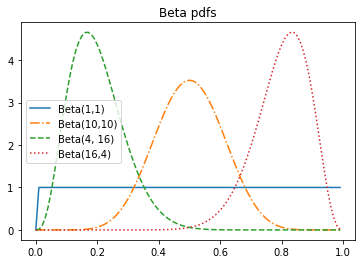

In [29]:
from matplotlib import pyplot as plt

xs = [x / 100.0 for x in range(0,100)]
plt.plot(xs,[beta_pdf(x,alpha=1,beta=1) for x in xs],'-',label='Beta(1,1)')
plt.plot(xs,[beta_pdf(x,alpha=10,beta=10) for x in xs],'-.',label='Beta(10,10)')
plt.plot(xs,[beta_pdf(x,alpha=4,beta=16) for x in xs],'--',label='Beta(4, 16)')
plt.plot(xs,[beta_pdf(x,alpha=16,beta=4) for x in xs],':',label='Beta(16,4)')
plt.legend()
plt.title('Beta pdfs')
plt.show()

### 베타분포 활용

동전 던지기에 대한 통계적 추론을 베타분포를 이용하여 갱신하는 과정을 살펴본다. 

#### 사전분포

주어진 동전에 대한 정확한 정보는 없다고 가정하고 사전분포를 베타분포를 이용하여 지정한다. 
다음은 다양한 경우에 어떤 베타분포를 선택하는지를 설명한다.

* $\alpha = \beta = 1$: 동전에 대한 어떤 입장도 취하고 싶지 않은 경우
* $\alpha = 55, \beta = 45$: 앞면으로 약각 편향되었다고 생각하는 경우
* $\alpha = \beta = 50$: 동전이 공평하다라고 강력하게 믿는 경우

아래 그래프는 위 값들을 사용한 베타분포를 보여준다.

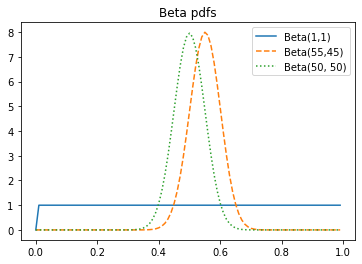

In [30]:
from matplotlib import pyplot as plt

xs = [x / 100.0 for x in range(0,100)]
plt.plot(xs,[beta_pdf(x,alpha=1,beta=1) for x in xs],'-',label='Beta(1,1)')
plt.plot(xs,[beta_pdf(x,alpha=55,beta=45) for x in xs],'--',label='Beta(55,45)')
plt.plot(xs,[beta_pdf(x,alpha=50,beta=50) for x in xs],':',label='Beta(50, 50)')
plt.legend()
plt.title('Beta pdfs')
plt.show()

#### 사후분포

이제 동전을 여러 번 던져서 앞면이 $h$번, 뒷면이 $t$번 나왔다고 가정하자.
그러면 앞면이 나올 확률의 사분포는 다음 값을 사용하는 베타함수이다. 

$$\alpha + h,\,\, \beta + t$$

예를 들어, 동전을 50번 던져 앞면이 20번, 뒷변이 30번 나왔을 때 사후확률분포 그래프는 다음과 같다.

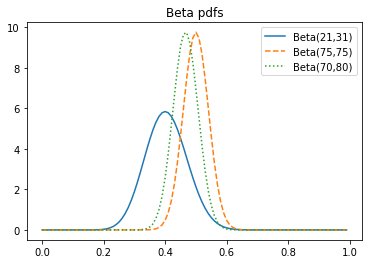

In [31]:
from matplotlib import pyplot as plt

xs = [x / 100.0 for x in range(0,100)]
plt.plot(xs,[beta_pdf(x,alpha=21,beta=31) for x in xs],'-',label='Beta(21,31)')
plt.plot(xs,[beta_pdf(x,alpha=75,beta=75) for x in xs],'--',label='Beta(75,75)')
plt.plot(xs,[beta_pdf(x,alpha=70,beta=80) for x in xs],':',label='Beta(70,80)')
plt.legend()
plt.title('Beta pdfs')
plt.show()

### 베이지안 추론 특징

* 동전 던지기의 경우처럼, 새로운 데이터가 많이 축적될 수록 사전분포의 의미는 점점 약해져서 결국 의미가 없어지고,
    동일한 사후분포에 수렴할 것이다. 
* 가설에 대해 확률적으로 말할 수 있게 된다.
    예를 들어, 다음과 같이 말할 수 있다.
    
    > "축적된 데이터를 고려할 때, 동전의 앞면이 나올 확률이 49%에서 51% 사이로 나올 확률이 5% 보다 크다"

### 사이파이 통계 모듈 활용

`scipy` 패키지의 `stats` 모듈을 이용하여 베타분포를 이용하여 확률을 계산할 수 있다.

* `scipy.stats` 모듈 임포트
* `beta` 클래스의 객체 생성. 
    * `alpha, beta` 지정.
* 인스턴스 메서드 활용
    * `pdf()`: 확률밀도함수(probability density function)
        * `beta_pdf()` 함수와 동일한 함수임.
    * `cdf()`: 누적분포함수(cumulative distribution function)
        * 확률이 특정 구간에 포함될 확률 계산
        * 앞서 가설검정에서 사용한 `normal_cdf`에 대응하는 함수임.        

#### `beta` 클래스 활용

주어진 동전이 공평한 동전이라는 강력한 믿음이 있다고 가정하자.
그러면 앞서 설명한대로 $\alpha=\beta=50$을 사용한다고 하였다.

아래 코드는 앞서 `beta_pdf()` 함수의 그래프에 해당하는 그래프를 
`scipy.stats.beta` 클래스의 `pdf()` 인스턴스 메소드로 그린 것이다. 

* 넘파이(`numpy`) 모듈의 `linspace()` 함수를 사용한
    `linspace(0, 1, 100)`는 앞서 사용한 아래 코드와 동일한 일을 한다.

```python
xs = [x / 100.0 for x in range(0,100)]
```

* `beta`는 베터분포 관련 클래스의 이름으로 고정되어 있음에 주의하라.
 따라서 `beta`를 더 이상 변수이름으로 사용하면 안된다. 
 아래 코드에서는 지금까지 사용된 변수이름과의 호환을 위해 숫자를 접미사로 추가하여 사용한다.

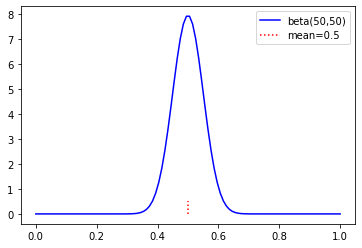

In [32]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)

alpha_0, beta_0 = 50, 50


rv = beta(alpha_0, beta_0)
plt.plot(x, rv.pdf(x), 'b-', label='beta(50,50)')
plt.plot([0.5, 0.5], [0,0.5], 'r:', label='mean=0.5')
plt.legend(loc='best')
plt.show()

동전을 50번 던져서 앞면이 20번, 뒷면애 30번 나왔다고 하자.
그러면 앞면이 나올 확률의 사후분포는 다음과 같다.

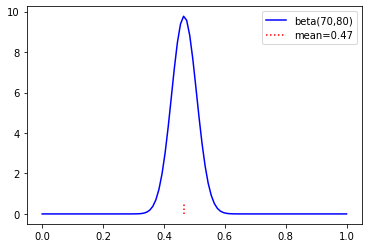

In [33]:
alpha_1, beta_1 = 70, 80


rv = beta(alpha_1, beta_1)
plt.plot(x, rv.pdf(x), 'b-', label='beta(70,80)')
plt.plot([7/15, 7/15], [0,0.5], 'r:', label='mean=0.47')
plt.legend(loc='best')
plt.show()

이제 누적분포함수(cdf)를 이용하여 동전 앞면이 나올 확률이 49%에서 51%에 속할 확률을 계산하면,
13.9%임을 확인하게 된다.

In [34]:
rv.cdf(0.51) - rv.cdf(0.49)

0.1390108141365065

### 주의사항

* 기존에는 아래와 같은 형식으로 통계적 추론을 진행하였다. 
    > "동전이 공평하다면 이렇게 앞면이 이렇게 극단적인 많이 나올 확률은 5%보다 작다"
* 베이즈 추론을 이용한 가설검정에 대해서는 논란의 여지가 있다. 
    또한 수학적으로도 매우 복잡하다. 
    따라서 앞으로 베이즈 추론을 더 이상 다루지 않는다.